# Unsupervised Learning: Clustering using K-Means Algorithm

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

It works as follows:
    
First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

You can visualize K-means clustering: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## K-means algorithm from scratch

In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
## First step: Defining the number of clusters k
k = 3

In [ ]:
## Second step: Setting cluster centers randomly
def initialize_centroids(data, k):
    return random.sample(data, k)

In [ ]:
## Euclidean distance ==> Similarity measure
def euclidean_distance(point1, point2):
    pass

In [ ]:
## Third step: Assigning point to clusters
def assign_to_clusters(data, centroids):
    pass

In [ ]:
def update_centroids(clusters):
    pass

In [ ]:
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return clusters, centroids

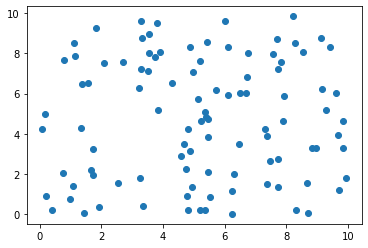

In [ ]:
# Test example
data = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(100)]
x, y = zip(*data)
plt.scatter(x, y)
plt.show()

In [ ]:
clusters, centroids = k_means(data, k)

In [ ]:
if clusters is not None:
    # Print the clusters
    for i, cluster in enumerate(clusters):
        print(f'Cluster {i + 1}: {cluster}')
else:
    print("Clusters are not available.")

# Check if centroids is not None before printing them
if centroids is not None:
    print(f'Centroids: {centroids}')
else:
    print("Centroids are not available.")

Clusters are not available.
Centroids are not available.


## Demo 1: A simple k-means clustering algorithm demo

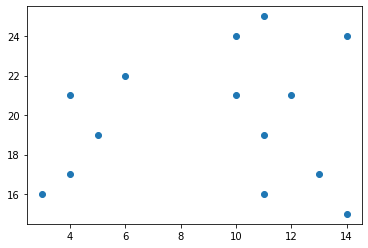

In [ ]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12, 14, 11, 11, 13]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 15, 19, 16, 17]

plt.scatter(x, y)
plt.show()

i== 1 inertia=  340.07142857142856
i== 2 inertia=  160.3111111111111
i== 3 inertia=  71.9
i== 4 inertia=  48.36666666666667
i== 5 inertia=  28.333333333333336
i== 6 inertia=  20.0
i== 7 inertia=  15.833333333333334
i== 8 inertia=  11.666666666666668
i== 9 inertia=  9.0
i== 10 inertia=  6.5
The elbow method shows that 3 (or 4) is a good value for K, so we retrain and visualize the result:


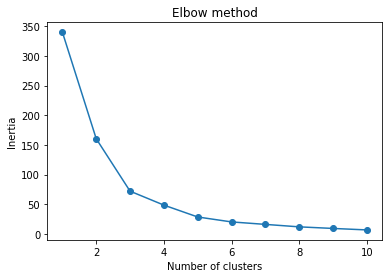

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    print("i==", i, "inertia= ", kmeans.inertia_ )

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print('The elbow method shows that 3 (or 4) is a good value for K, so we retrain and visualize the result:')

### A Simple Illustration of the Elbow Method

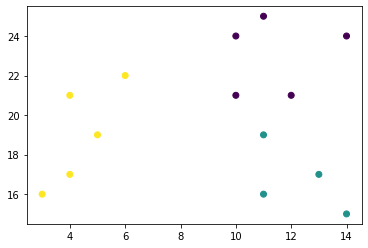

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

## Demo 2: Mall Customer Segmentation Data using K-means clustering

<b>Content: </b>
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

<b>Problem Statement: </b>
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

<b>Inspiration: </b>
By the end of this case study , you would be able to answer below questions.
<ol>
<li>How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in a simplest way.</li>
<li>Who are your target customers with whom you can start marketing strategy [easy to converse/ target customers]</li>
<li>How the marketing strategy works in real world</li>
</ol>

In [ ]:
## Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
## Loading the Data
df_mall = pd.read_csv("Mall_Customers.csv")
print('Total Rows : ', len(df_mall))
print('Total Columns : ', len(df_mall.columns))

Total Rows :  200
Total Columns :  5


In [ ]:
df_mall.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
22,23,Female,46,25,5
176,177,Male,58,88,15
110,111,Male,65,63,52
155,156,Female,27,78,89
119,120,Female,50,67,57


In [ ]:
## Exploratory Data Analysis and Data Pre-processing

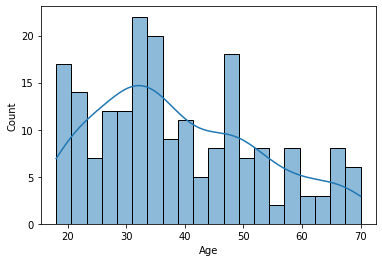

In [ ]:
sns.histplot(df_mall['Age'], bins = 20, kde = True)
plt.show()

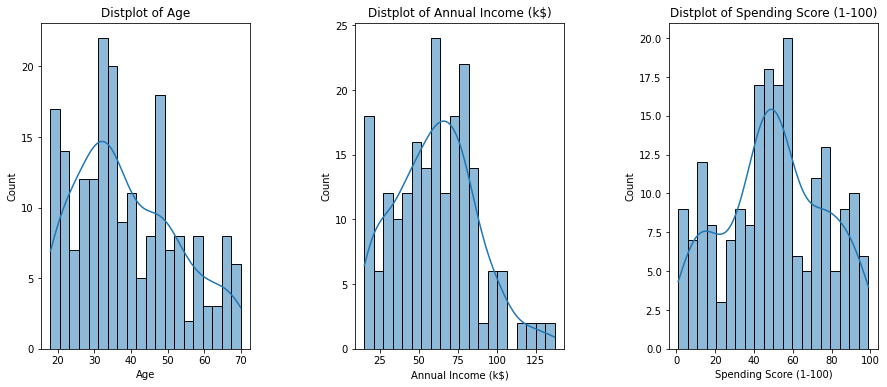

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for column in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df_mall[column] , bins = 20, kde = True)
    plt.title('Distplot of {}'.format(column))
plt.show()

In [ ]:
df_mall.Gender.value_counts()

Female 112
Male 88
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

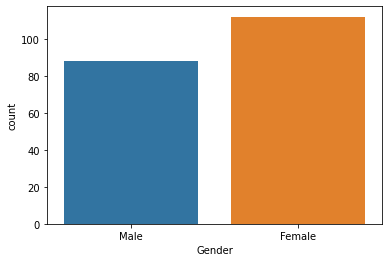

In [ ]:
sns.countplot(x = df_mall['Gender'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

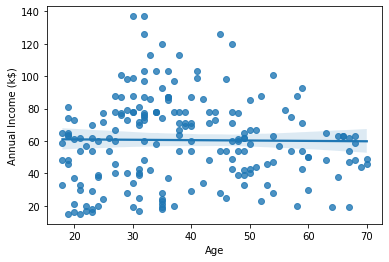

In [ ]:
sns.regplot(x = df_mall['Age'], y = df_mall['Annual Income (k$)'])

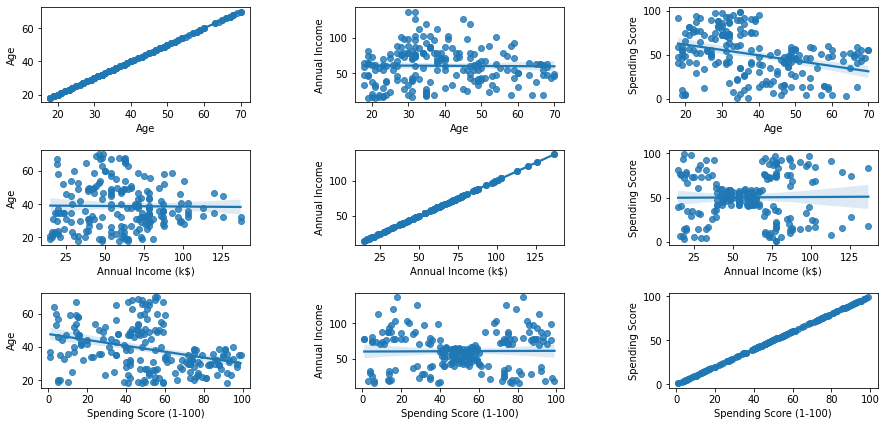

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_mall)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

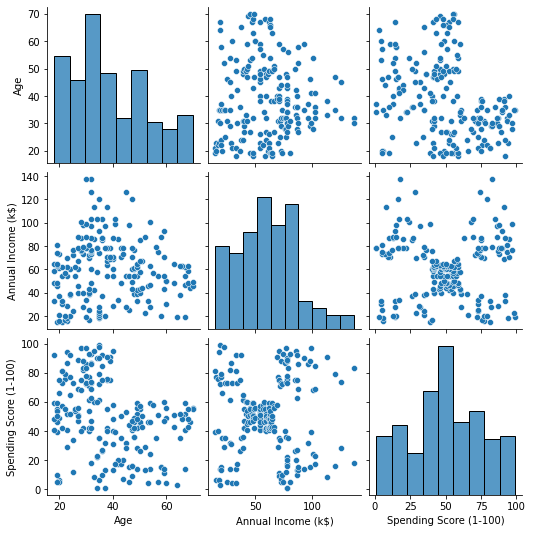

In [ ]:
sns.pairplot(df_mall[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']])

In [ ]:
## Clustering using K- means
## To simplify the visualization of the clustering, we are going to use two features Age and Annual Income (K$)
df_age_income = df_mall[['Age', 'Annual Income (k$)']]

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

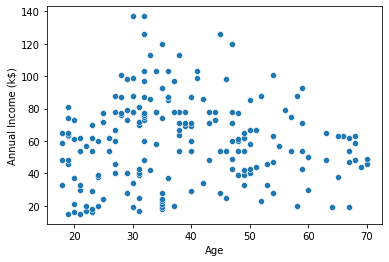

In [ ]:
sns.scatterplot(x = df_age_income['Age'], y = df_age_income['Annual Income (k$)'])

In [ ]:
## Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_age_income)
labels = kmeans.labels_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1], dtype=int32)

In [ ]:
# Ajout des étiquettes de clustering au dataframe
df_age_income.loc[:, 'label_kmeans'] = labels

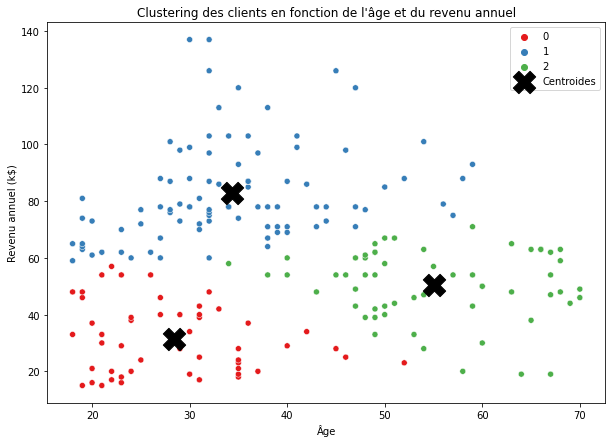

In [ ]:
# Visualisation des clusters
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=df_age_income['Age'], y=df_age_income['Annual Income (k$)'], hue=df_age_income['label_kmeans'], palette='Set1')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, marker='X', label='Centroides')
ax.set_ylabel('Revenu annuel (k$)')
ax.set_xlabel('Âge')
plt.title('Clustering des clients en fonction de l\'âge et du revenu annuel')
plt.legend()
plt.show()

In [ ]:
centers

array([[28.36 , 31.44 ],
 [34.34782609, 82.82608696],
 [55.03448276, 50.34482759]])